In [2]:
%matplotlib inline
import os

import pandas as pd
import xarray as xr

import rtmtools.clirad.sw.wrangle as swwrangle
import rtmtools.lblrtm.visualisation as viz

In [3]:
dir_run = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O_gpts'

In [27]:
def filepath():
    path_CLIRAD_OUTPUT_gpts = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O_gpts/OUTPUT_CLIRAD_gpts.dat'
    return path_CLIRAD_OUTPUT_gpts


def filepath_trank():
    rundir = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O_gpts'
    filename = 'trank.dat'
    return os.path.join(rundir, filename)


def load_trank_data(filepath='trank.dat'):
    df = pd.read_csv(filepath,
                     sep=r'\s+')
    return df


def organise_th2o():
    df = pd.read_csv(os.path.join(dir_run, 'th2o.dat'), sep=r'\s+')
    df = df.drop('i', axis=1)
    df = df.set_index(['k1', 'k2', 'ibn', 'ik'])
    df = df.unstack(['ibn', 'ik'])
    return df


def export_to_excel():
    with pd.ExcelWriter('mls_H2O_gpts.xlsx') as writer:
        
        df_coolingrate = ds['cooling_rate']\
                             .to_dataframe()\
                             .unstack(['ib', 'ik'])
                
        df_fluxes = ds[['flux_up', 'flux_down']]\
                        .to_dataframe()\
                        .stack().unstack([0, 1, 3])
        
        df_h2o = organise_th2o()
        
        df_coolingrate.to_excel(writer, sheet_name='cooling_rate')
        df_fluxes.to_excel(writer, sheet_name='fluxes')
        df_h2o.to_excel(writer, sheet_name='th2o')

In [21]:
def plot_pressure_VS_dTdt_linearlog(ds, whichrate = 'heating_rate', ib = 7):
    
    Nik = 6
    
    srss = [ds[whichrate].sel(ib = ib, ik = ik).to_pandas() for ik in range(1, Nik + 1)]
    names = ['(ib, ik) = ({}, {})'.format(ib, ik) for ik in range(1, Nik + 1)]
        
    #colours, linestyles = zip(*unique_colour_linestyle_pairs(Npairs = Nik))
    colours, linestyles = zip(*viz.matplotlib_colour_linestyle_tuples(N = Nik))
    
    ylabel, xlabel = 'pressure [mbar]', '{} [deg/day]'.format(whichrate)
    title = 'Band {}'.format(ib)
    figsize = (15, 10)
    
    fig = viz.plot_pdseries_indexVSvalues_linearlog(srss = srss,\
                                                names = names,
                                                colours = colours,
                                                linestyles = linestyles,
                                                ylabel = ylabel,
                                                xlabel = xlabel,
                                                figsize = figsize,
                                                title = title)
    return fig

In [28]:
ds = swwrangle.load_clirad_solirgpts(fpath=filepath(),
                                     signed_fluxes=True,
                                     cooling_rate=True)

In [29]:
def export_to_excel():
    with pd.ExcelWriter('mls_H2O_gpts.xlsx') as writer:
        
        df_coolingrate = ds['cooling_rate']\
                             .to_dataframe()\
                             .unstack(['ib', 'ik'])
                
        df_fluxes = ds[['flux_up', 'flux_down']]\
                        .to_dataframe()\
                        .stack().unstack([0, 1, 3])
        
        df_h2o = organise_th2o()
        
        df_coolingrate.to_excel(writer, sheet_name='cooling_rate')
        df_fluxes.to_excel(writer, sheet_name='fluxes')
        df_h2o.to_excel(writer, sheet_name='th2o')

In [30]:
export_to_excel()

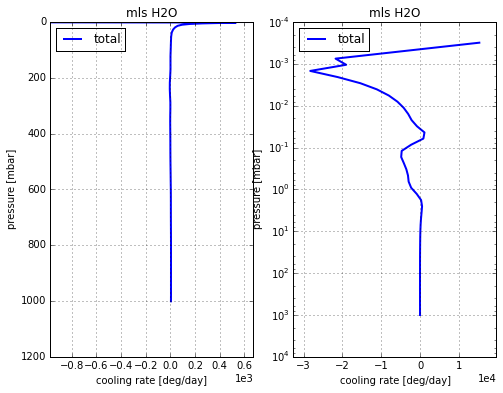

In [125]:
srs = ds['cooling_rate'].sum(dim=['ib', 'ik']).to_pandas()

names = ['total']
colours = ['b']
linestyles = ['-']
ylabel = 'pressure [mbar]'
xlabel = 'cooling rate [deg/day]'
figsize = (8, 6)
title = 'mls H2O'

fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=[srs],
                                                names=names,
                                                colours=colours,
                                                linestyles=linestyles,
                                                ylabel=ylabel,
                                                xlabel=xlabel,
                                                figsize=figsize,
                                                title=title)

In [15]:
!ls

atmpro_mls70_CH4.h5
atmpro_mls70_H2O_CO2.h5
atmpro_mls70_H2O_CO2_O3.h5
atmpro_mls70_H2O_O3.h5
atmpro_mls70_N2O.h5
atmpro_preparation.ipynb
integrated_line_intensity_comparisons.xlsx
lblrtm_solar_TAPE13.ipynb
line_by_line_absorption_data.ipynb
linestrength_comparison.ipynb
linestrength_varying_temperature.ipynb
longwave_mls_CH4.ipynb
longwave_mls_CO2.ipynb
longwave_mls_H2O_CO2.ipynb
longwave_mls_H2O_CO2_O3_cont.ipynb
longwave_mls_H2O_CO2_O3.ipynb
longwave_mls_H2O_gpts.ipynb
longwave_mls_H2O.ipynb
longwave_mls_H2O_O3.ipynb
longwave_mls_N2O.ipynb
longwave_mls_O3.ipynb
longwave_write_out_result_summaries.ipynb
mls_H2O_gpts.xlsx
notes_-_CLIRAD_LW.ipynb
O3_abs.ipynb
results_summary
rrtmg_aerosol
shortwave_mls75_H2O_solzen_xs_H2012.ipynb
shortwave_mls_CO2.ipynb
shortwave_mls_H2O.ipynb
shortwave_mls_H2O_solir_gpts.ipynb
shortwave_mls_H2O_solir_gpts_newparams.ipynb
shortwave_mls_O3.ipynb
shortwave_write_out_result_summaries.ipynb
solar_spectral_irradiance.ipynb
trace_rrtmg_column_model.ipynb
Un

In [25]:
organise_th2o??